# Modelos de Regresión. End to End
## Predecir la calidad del vino
## data/winequality-red


In [39]:
# Decision Tree, Bagging, Pasting, RandomForest, ExtraTrees y AdaBoost
import pandas as pd
vinos = pd.read_csv("data/winequality-red.csv")

In [40]:
len(vinos)

1599

In [41]:
vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [43]:
vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
vinos["quality"].value_counts(normalize=True)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vinos.drop(columns=["quality"]), vinos["quality"], test_size=0.2, random_state=1743)


In [46]:
y_train.value_counts(normalize=True)

quality
5    0.437842
6    0.395622
7    0.117279
4    0.032056
8    0.010164
3    0.007037
Name: proportion, dtype: float64

In [47]:
y_test.value_counts(normalize=True)

quality
6    0.412500
5    0.378125
7    0.153125
4    0.037500
8    0.015625
3    0.003125
Name: proportion, dtype: float64

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
X = vinos.drop(columns=["quality"])
y = vinos["quality"]
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1743)
for train_index, test_index in split.split(X, y):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [49]:
train_y_set.value_counts(normalize=True)

quality
5    0.426114
6    0.398749
7    0.124316
4    0.032838
8    0.011728
3    0.006255
Name: proportion, dtype: float64

In [50]:
test_y_set.value_counts(normalize=True)

quality
5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: proportion, dtype: float64

In [51]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "regression_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree_cls = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=1808)
tree_cls.fit(train_set, train_y_set)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=1808)

In [53]:
clases = list(range(3,9))
clases = [str(x) for x in clases]

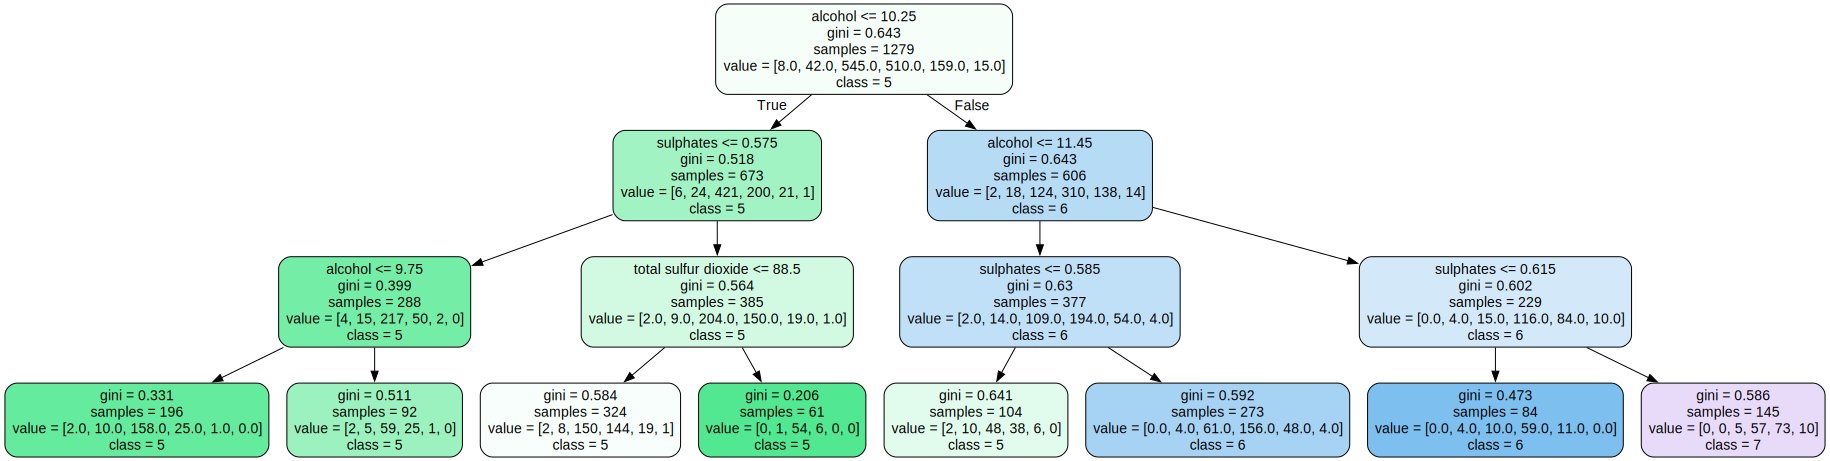

In [54]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_cls,
    out_file=str(IMAGES_PATH / "clasification_tree.dot"),
    feature_names=train_set.columns,
    class_names=clases,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "clasification_tree.dot")

In [55]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report
accuracy_score(train_y_set, tree_cls.predict(train_set))

0.5918686473807663

In [56]:
baseline = 545/1279
baseline

0.4261141516810008

In [57]:
multilabel_confusion_matrix(train_y_set, tree_cls.predict(train_set))

array([[[1271,    0],
        [   8,    0]],

       [[1237,    0],
        [  42,    0]],

       [[ 426,  308],
        [  76,  469]],

       [[ 627,  142],
        [ 295,  215]],

       [[1048,   72],
        [  86,   73]],

       [[1264,    0],
        [  15,    0]]], dtype=int64)

In [58]:
classification_report(train_y_set, tree_cls.predict(train_set), target_names=clases, output_dict=True)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

{'3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8.0},
 '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 42.0},
 '5': {'precision': 0.6036036036036037,
  'recall': 0.8605504587155963,
  'f1-score': 0.7095310136157338,
  'support': 545.0},
 '6': {'precision': 0.6022408963585434,
  'recall': 0.4215686274509804,
  'f1-score': 0.49596309111880044,
  'support': 510.0},
 '7': {'precision': 0.503448275862069,
  'recall': 0.4591194968553459,
  'f1-score': 0.48026315789473684,
  'support': 159.0},
 '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15.0},
 'accuracy': 0.5918686473807663,
 'macro avg': {'precision': 0.284882129304036,
  'recall': 0.2902064305036538,
  'f1-score': 0.28095954377154514,
  'support': 1279.0},
 'weighted avg': {'precision': 0.5599336176457311,
  'recall': 0.5918686473807663,
  'f1-score': 0.559810336979223,
  'support': 1279.0}}

In [59]:
from sklearn.ensemble import RandomForestClassifier
rnd_frt = RandomForestClassifier(n_estimators=5000, max_depth=3, min_samples_leaf=30, random_state=1808)
rnd_frt.fit(train_set, train_y_set)

RandomForestClassifier(max_depth=3, min_samples_leaf=30, n_estimators=5000,
                       random_state=1808)

In [60]:
accuracy_score(train_y_set, rnd_frt.predict(train_set))

0.6153244722439406

In [61]:
rnd_frt.feature_importances_

array([0.02932085, 0.12375546, 0.03566731, 0.00740176, 0.02953087,
       0.01540007, 0.1422775 , 0.07902663, 0.01212592, 0.16801047,
       0.35748316])

In [62]:
rnd_frt.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rnd_frt_2 = RandomForestClassifier(n_estimators=5000, max_depth=3, min_samples_leaf=30, max_features="sqrt", random_state=1808)
rnd_frt_2.fit(train_set, train_y_set)

RandomForestClassifier(max_depth=3, min_samples_leaf=30, n_estimators=5000,
                       random_state=1808)

In [64]:
accuracy_score(train_y_set, rnd_frt_2.predict(train_set))

0.6153244722439406

In [65]:
rnd_frt_2.feature_importances_

array([0.02932085, 0.12375546, 0.03566731, 0.00740176, 0.02953087,
       0.01540007, 0.1422775 , 0.07902663, 0.01212592, 0.16801047,
       0.35748316])

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
ext_frt = ExtraTreesClassifier(n_estimators=5000, min_samples_leaf=30, max_features=4, random_state=1808)
ext_frt.fit(train_set, train_y_set)

ExtraTreesClassifier(max_features=4, min_samples_leaf=30, n_estimators=5000,
                     random_state=1808)

In [70]:
accuracy_score(train_y_set, ext_frt.predict(train_set))

0.6121970289288506

In [71]:
accuracy_score(test_y_set, ext_frt.predict(test_set))

0.5625

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
ext_frt_2 = ExtraTreesClassifier(n_estimators=5000, min_samples_leaf=30, max_features=4, random_state=1808, bootstrap=True)
ext_frt_2.fit(train_set, train_y_set)

ExtraTreesClassifier(bootstrap=True, max_features=4, min_samples_leaf=30,
                     n_estimators=5000, random_state=1808)

In [74]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=30, random_state=1808), learning_rate=0.05, n_estimators=5000, random_state=1808)
ada.fit(train_set, train_y_set)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=30,
                                                    random_state=1808),
                   learning_rate=0.05, n_estimators=5000, random_state=1808)

In [75]:
accuracy_score(test_y_set, ada.predict(test_set))

0.64375

In [77]:
accuracy_score(train_y_set, ada.predict(train_set))

0.8318999218139171

In [84]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "learning_rate": [0.05*x for x in range(1,20)],
    "n_estimators": range(1000, 10001, 1000),
    "estimator__max_depth": range(2, 13),
    "estimator__max_features": [3, 4, 5],
    "estimator__min_samples_leaf": [1, 5, 20, 30, 50],
}

rnd_grid = RandomizedSearchCV(AdaBoostClassifier(DecisionTreeClassifier(random_state=1808) ,random_state=1808), 
                              param_distributions=params, 
                              n_iter=5,
                              cv=5)

In [85]:
rnd_grid.fit(train_set, train_y_set)

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1808),
                                                random_state=1808),
                   n_iter=5,
                   param_distributions={'estimator__max_depth': range(2, 13),
                                        'estimator__max_features': [3, 4, 5],
                                        'estimator__min_samples_leaf': [1, 5,
                                                                        20, 30,
                                                                        50],
                                        'learning_rate': [0.05, 0.1,
                                                          0.15000000000000002,
                                                          0.2, 0.25,
                                                          0.30000000000000004,
                                                          0.35000000000000003,
                                                          0.4, 0.45, 0.5, 0.55,
                                                          0.6000000000000001,
                                                          0.65,
                                                          0.7000000000000001,
                                                          0.75, 0.8,
                                                          0.8500000000000001,
                                                          0.9,
                                                          0.9500000000000001],
                                        'n_estimators': range(1000, 10001, 1000)})

In [89]:
rnd_grid.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 9,
 'estimator__max_features': 5,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 20,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': 1808,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=9, max_features=5, min_samples_leaf=20,
                        random_state=1808),
 'learning_rate': 0.9500000000000001,
 'n_estimators': 2000,
 'random_state': 1808}

In [90]:
accuracy_score(test_y_set, rnd_grid.predict(test_set))

0.6625

In [91]:
accuracy_score(train_y_set, ada.predict(train_set))

0.8318999218139171